# Step 1 : Install & Import Required Libraries

In [1]:
# Install SQLite3 (comes built in with python)
import sqlite3

# InstallPandas for Data Analysis
import pandas as pd

# Install Seaborn & Matplotlib for Visualization 
import matplotlib.pyplot as plt 
import seaborn as sns 

# This method hides any warnings in your Juoyter Notebook.
import warnings
warnings.filterwarnings("ignore")

# Step 2: Creat a New SQLite Database And Table

In [27]:
# Connect to SQLite Database (Creates a New file if it doesn't exist)
conn = sqlite3.connect("Customer_data.db")

#Create a Cursor to interact with database
cursor = conn.cursor()

# Drop table if it exists
cursor.execute("DROP TABLE IF EXISTS customers")

#Create a sample table
cursor.execute("""
CREATE TABLE IF NOT EXISTS customers (
id INTEGER PRIMARY KEY AUTOINCREMENT,
name TEXT,
age INTERGER,
city TEXT,
total_spent REAL
)
""")

# Commit and Close the connection
conn.commit()


# Step 3: Insert Sample Data Into the SQL Table

In [32]:
# Sample data to insert 
customers= [
    ("Alice Jhonson", 28, "New York", 500.75),
    ("Bob Smith", 35, "Los Angeles", 1200.50),
    ("Charlie Brown", 22, "Chicago", 330.40),
    ("David White", 40, "Houston", 980.90),
    ("Emma Wilson", 31, "San Francisco", 700.60)
]

# Insert data into table
cursor.executemany ("INSERT INTO customers (name, age, city, total_spent) VALUES (?, ?, ?, ?)", customers)

# Commit Changes
conn.commit()



In [33]:
# Run aSQL Query to Retrieve all customer data

query = "SELECT *FROM customers"
df = pd.read_sql(query, conn) # Store query results in a Pandas DataFrame 

# Display the data
df.head()

,id,name,age,city,total_spent
0,1,Alice Jhonson,28,New York,500.75
1,2,Bob Smith,35,Los Angeles,1200.50
2,3,Charlie Brown,22,Chicago,330.40
3,4,David White,40,Houston,980.90
4,5,Emma Wilson,31,San Francisco,700.60


# Step 5: Perform Data Analysis Using SQL Queries

In [34]:
query = "SELECT * FROM customers WHERE total_spent > 500"
pd.read_sql(query, conn)

,id,name,age,city,total_spent
0,1,Alice Jhonson,28,New York,500.75
1,2,Bob Smith,35,Los Angeles,1200.50
2,4,David White,40,Houston,980.90
3,5,Emma Wilson,31,San Francisco,700.60


In [37]:
# Find the average customer age

query = "SELECT AVG(age) AS average_age FROM customers"
pd.read_sql(query, conn)

,average_age
0,31.2


In [36]:
# Count customers in each city 
query = "SELECT city, COUNT(*) AS num_customers FROM customers GROUP BY city"
pd.read_sql(query, conn)

,city,num_customers
0,Chicago,1
1,Houston,1
2,Los Angeles,1
3,New York,1
4,San Francisco,1


# Step 6: Visualization SQL Query Results Using Python


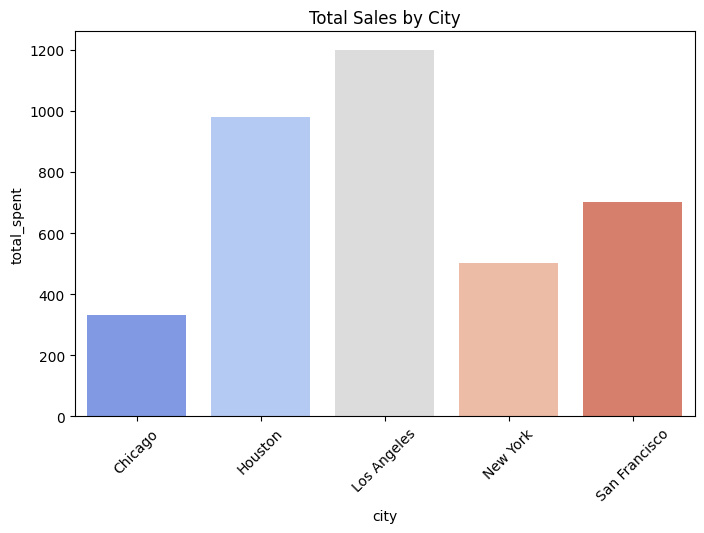

In [44]:
# Run SQL query and store results in DataFrame
query = "SELECT city, SUM(total_spent) AS total_spent FROM customers GROUP BY city"
df_sales = pd.read_sql(query, conn)

# Plot hte Data
plt.figure(figsize=(8,5))
sns.barplot(x="city", y="total_spent", data=df_sales, palette="coolwarm")
plt. xticks(rotation=45)
plt.title("Total Sales by City")
plt.show()


# Step 7: Close the SQL Connection


In [45]:
conn.close()

# THANK YOU